# Line graph, area graph etc. 

In [1]:
%ls datasets

adult.csv                  census.csv     movies.csv
airline_data.csv           coches.csv     nhanes_2015_2016.csv
antropometria00.csv        cwurData.csv   pokemon.csv
antropometria-dataset.csv  data.csv       reg_data.csv
Book3.csv                  headbrain.csv  sample_pivot.csv
Canada.xlsx                mic2.xlsx      tips.csv
Cartwheeldata.csv          mic.xlsx       weight-height.csv


In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_excel('datasets/Canada.xlsx',
                  sheet_name = 'Canada by Citizenship',
                  engine = 'openpyxl',
                  skiprows = range(20),
                  skipfooter = 2
                  )
df.head(2)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603


# description of datasset.

This dataset explains, .........

In [6]:
df.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [7]:
df.drop(['Type', 'Coverage', 'AREA', 'REG', 'DEV', 'DevName',],
        axis = 1,
        inplace = True)
df.columns

Index([  'OdName', 'AreaName',  'RegName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [8]:
df.columns

Index([  'OdName', 'AreaName',  'RegName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [9]:
df.rename(columns = {'OdName': 'Country', 
                     'AreaName':'Continent', 
                     'RegName': 'Region',},
         inplace = True
         )

In [10]:
df.head()

,Country,Continent,Region,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [11]:
df.columns

Index([  'Country', 'Continent',    'Region',        1980,        1981,
              1982,        1983,        1984,        1985,        1986,
              1987,        1988,        1989,        1990,        1991,
              1992,        1993,        1994,        1995,        1996,
              1997,        1998,        1999,        2000,        2001,
              2002,        2003,        2004,        2005,        2006,
              2007,        2008,        2009,        2010,        2011,
              2012,        2013],
      dtype='object')

In [12]:
df.columns = list(map(str,df.columns))
df.columns

Index(['Country', 'Continent', 'Region', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013'],
      dtype='object')

## description of the variables

`Country` - Is a variable, column, represents the origin of the people. Type of this is a variable is Str

`Continent´ - ........

`Region' = ..... ......

`1980 - 2013' - is columns represents the number inmingrats from different countries to canada

1. What is distribution of immigration from Japan to Canada during 1980 to 2013?

In [13]:
df.set_index('Country', inplace = True)

In [14]:
df.head()

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,132,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,0,...,0,0,1,1,0,0,0,0,1,1


In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [16]:
df.head(2)

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1450,1223,856,702,560,716,561,539,620,603


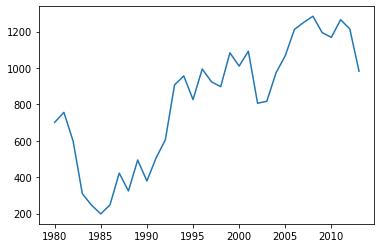

In [17]:
df.loc['Japan', '1980':].plot()
plt.show()

In [18]:
mpl.style.use('ggplot')

In [19]:
print(mpl.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [21]:
## Conclusion: 

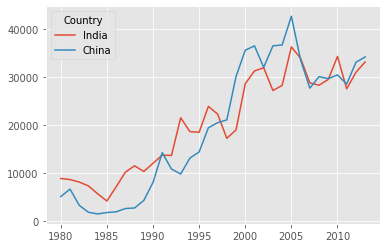

In [26]:
ci = df.loc[['India', 'China'], '1980':].transpose()
ci.plot()
plt.show()